In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def normalize(fold_data,icount_data): #creating function for normalizing folded pulse data
    
    norm_data = np.zeros_like(fold_data) #initializing array for normalized data
    
    for i in range(len(fold_data[:,:,:])): #looping over how ever many itterations within the folded data necessary to fill norm_data
        norm_data[:,:,:,i] = fold_data[:,:,:,i]/icount_data[:,:,:] #normalizing data
    
    return norm_data

In [5]:
start = "arochime-invpfbB0329+54_32768chan3ntbin"
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"

#final code will look something like:
#need to add plotting line, need to add second for loop for strings with :00 instead of :30
# i = 0
# for filename in filenames:
#     fold = np.load(start+fold+str(i+38)+":"+str(30)+end+".npy")
#     count = np.load(start+icount+str(i+38)+":"+str(30)+end+".npy")
#     norm = normalize(fold,count)
#     #plotting line
#     plt.savefig(start+fold+str(i+38)+":"+str(30)+end+".png")
#     i = i+1
    
test = np.load(start+fold+str(38)+":"+str(30)+end+".npy")

In [8]:
#what metadata reads:
    #arochime - data from arochime
    #invpfb - something specific to arochime???????
    #B0329+54 - pulsar name
    #32768 - number of entries in the frequency axis
    #chan3t - ???????????
    #foldspec/icount - folded pulse signals or icount data
    #_2018_08-16 - date at which data was taken
    #T - time
    #10:38:30.00 - 10 O'clock and 38 minutes and 30 seconds
    #30.000000000000004sec - data taken over 30 second interval?????????
    #.npy - filetype
data1 = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:38:30.000+30.000000000000004sec.npy")
data2 = np.load("arochime-invpfbB0329+54_32768chan3ntbinicount_2018-08-16T10:38:30.000+30.000000000000004sec.npy")
data3 = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:39:00.000+30.000000000000004sec.npy")
data4 = np.load("arochime-invpfbB0329+54_32768chan3ntbinicount_2018-08-16T10:39:00.000+30.000000000000004sec.npy")

In [9]:
new_data = normalize(data1,data2)
#print(new_data[0,0,:,0]) #phase x
#print(new_data[0,:,0,0]) #freuecy y
#plt.plot(new_data[0,0,:,0],new_data[0,:,0,0])

In [10]:
ndata = np.zeros_like(data2)
ndata2 = np.zeros_like(data1)

for i in range(len(data1[:,:,:])):
    ndata2[:,:,:,i] = data1[:,:,:,i]/data2[:,:,:]

#print(ndata2)

In [ ]:
#################### EVERYTHING BELOW IS SCRATCH WORK ############################

In [45]:
len(data1)
print(data1[0,:,0,0])
#print(data1[0,0,:,0])
print(data1[:,0,1,0])

[20.894543 22.04368  23.128796 ... 35.283733 35.07841  34.861423]
[19.661644 20.953207 16.106157]


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


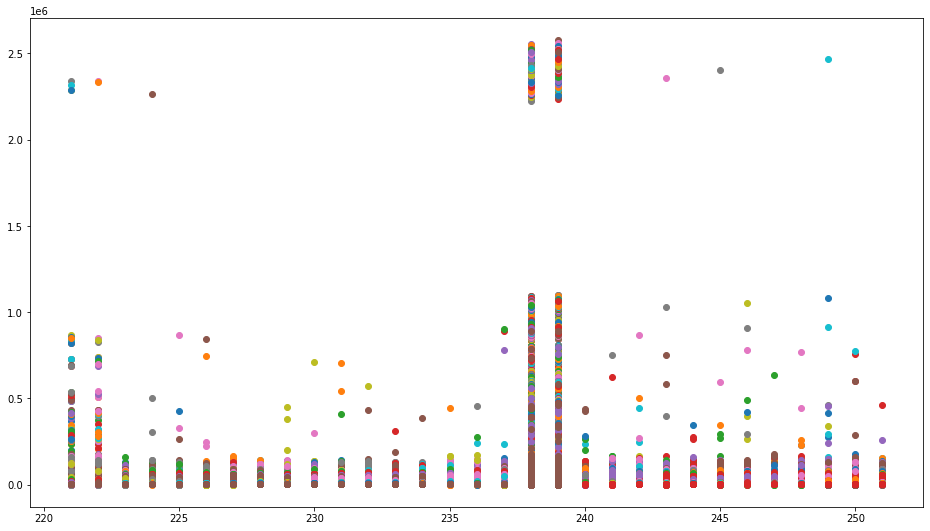

In [70]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
            plt.plot(data2[i,:,j],data1[i,:,j,0], 'o')
    #plt.xlim(237,240)
plt.savefig('fig1.png')
%time

In [83]:
%time
#test1 = np.zeros_like(data1)
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test1[i,:,j,0] = test1[i,:,j,0]+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.1 µs


NameError: name 'test1e' is not defined

In [86]:
%time
#test1 = np.zeros_like(data1)
test_01 = np.zeros(len(data1[0,:,0,0]))
interm = np.zeros_like(data1)
for i in range(len(data1)):
    for j in range(len(data1[0,0,:,0])):
        test_01 = test_01+data1[i,:,j,0]
    #plt.xlim(237,240)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs


32768

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.78 µs


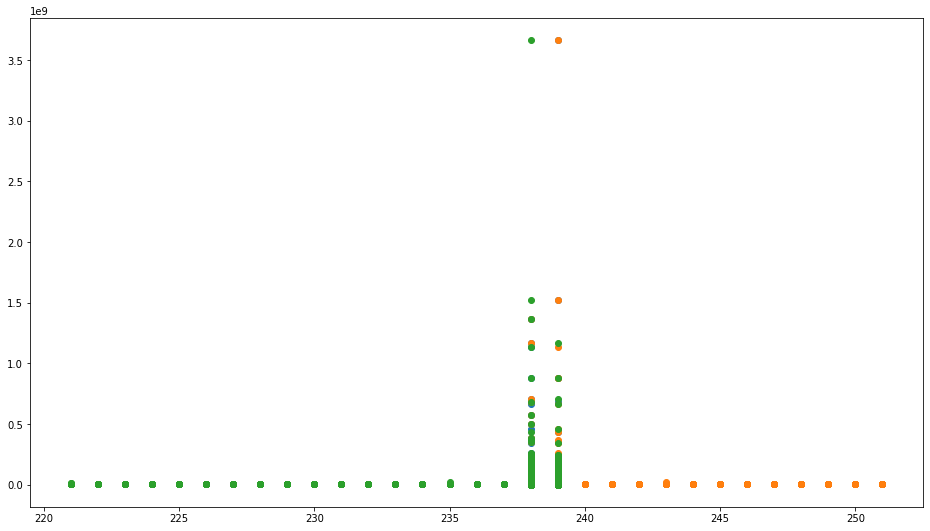

In [89]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,0],test_01, 'o')
plt.savefig('fig2.png')
%time

In [82]:
print(len(test1[0,0,:,0]))

512


In [ ]:
plt.figure(figsize=(16,9))
for i in range(len(data1)):
    plt.plot(data2[i,:,j],test1[i,:,j,0], 'o')
plt.savefig('fig2.png')
%time